# Causality statistics for five patients

In [19]:
# imports

# Allow display of images
from IPython.display import display, Image

# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd

# Add path
import os
import sys
path = os.path.abspath(os.path.join('..'))
sys.path.append(path)

# Tools from brainsignal library
import brainsignal.datageneration as dg
import brainsignal.datanalysis as da
import brainsignal.preprocessing as pp
import brainsignal.causality as ca

# This makes the plots appear inside the notebook
%matplotlib inline

In [20]:
from re import sub
import re
module_path = os.path.abspath(os.path.join('../data'))
if module_path not in sys.path:
    sys.path.append(module_path)


In [21]:
# os.walk recursively visits all subfolders with their files
file_paths = []
counter = 0
for path, subdirs, files in os.walk(module_path):
    if path.split('/')[-1] == 'saved_statistics':
        for s in subdirs:
            file_paths.append('../data/saved_statistics/' + s + '/' + s + '_Gc_data.txt')
        break

data_tables = []
for path in file_paths:
    data_tables.append(pd.read_table(path, delimiter = '\t', ))

### About the tests

We test the null hypothesis that one signal 1 does not Granger causes the other signal 2. 

Signal 1 and 2 are either ABP and ICP, or ICP and ABP respectievly. 

A low p-value is evidence for rejecting the null hypothesis. A p-value under 0.05 means we conclude that signal 1 does Granger causes signal 2 with a significance level of 0.05. 

The lower the p-value, the more certain we are that signal 1 Granger causes signal 2. 

In the plots below, the 0.05 significance level is plotted as a horizontal line. 

### Testing if ABP Granger causes ICP

In [22]:
y_to_x_p_median_1 = data_tables[0][['y_to_x_p_median']]
y_to_x_p_median_2 = data_tables[1][['y_to_x_p_median']]
y_to_x_p_median_3 = data_tables[2][['y_to_x_p_median']]
y_to_x_p_median_4 = data_tables[3][['y_to_x_p_median']]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
n1 = len(y_to_x_p_median_1)
n2 = len(y_to_x_p_median_2)
n3 = len(y_to_x_p_median_3)
n4 = len(y_to_x_p_median_4)
time_hours1 = np.linspace(0, n1, n1)*60/60/60
time_hours2 = np.linspace(0, n2, n2)*60/60/60
time_hours3 = np.linspace(0, n3, n3)*60/60/60
time_hours4 = np.linspace(0, n4, n4)*60/60/60
ax1.plot(time_hours1, y_to_x_p_median_1)
ax1.plot(time_hours1, 0*time_hours1+0.05)
ax1.set_title("Patient 1", fontsize=10)
ax1.set_ylabel("p-value")
ax2.plot(time_hours2, y_to_x_p_median_2)
ax2.plot(time_hours2, 0*time_hours2+0.05)
ax2.set_title("Patient 2", fontsize=10)
ax3.plot(time_hours3, y_to_x_p_median_3)
ax3.plot(time_hours3, 0*time_hours3+0.05)
ax3.set_title("Patient 3", fontsize=10)
ax3.set_xlabel("time [hours]")
ax3.set_ylabel("p-value")
ax4.plot(time_hours4, y_to_x_p_median_4)
ax4.plot(time_hours4, 0*time_hours4+0.05)
ax4.set_title("Patient 4", fontsize=10)
ax4.set_xlabel("time [hours]")
fig.suptitle('Test if ABP Granger causes ICP', fontsize=12)
fig.legend(['p-value', '0.05'], framealpha=0)
fig.tight_layout(pad=1)
plt.savefig("../data/figures/ABP_gc_ICP_pat_1_to_4.jpg", dpi=1000)

### Testing if ICP Granger causes ABP

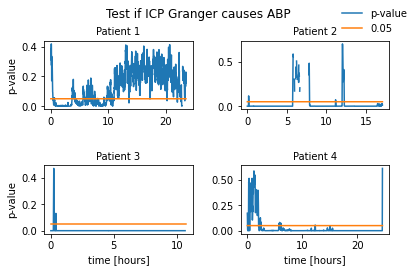

In [23]:
x_to_y_p_median_1 = data_tables[0][['x_to_y_p_median']]
x_to_y_p_median_2 = data_tables[1][['x_to_y_p_median']]
x_to_y_p_median_3 = data_tables[2][['x_to_y_p_median']]
x_to_y_p_median_4 = data_tables[3][['x_to_y_p_median']]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
n1 = len(x_to_y_p_median_1)
n2 = len(x_to_y_p_median_2)
n3 = len(x_to_y_p_median_3)
n4 = len(x_to_y_p_median_4)
time_hours1 = np.linspace(0, n1, n1)*60/60/60
time_hours2 = np.linspace(0, n2, n2)*60/60/60
time_hours3 = np.linspace(0, n3, n3)*60/60/60
time_hours4 = np.linspace(0, n4, n4)*60/60/60
ax1.plot(time_hours1, x_to_y_p_median_1)
ax1.plot(time_hours1, 0*time_hours1+0.05)
ax1.set_title("Patient 1", fontsize=10)
ax1.set_ylabel("p-value")
ax2.plot(time_hours2, x_to_y_p_median_2)
ax2.plot(time_hours2, 0*time_hours2+0.05)
ax2.set_title("Patient 2", fontsize=10)
ax3.plot(time_hours3, x_to_y_p_median_3)
ax3.plot(time_hours3, 0*time_hours3+0.05)
ax3.set_title("Patient 3", fontsize=10)
ax3.set_xlabel("time [hours]")
ax3.set_ylabel("p-value")
ax4.plot(time_hours4, x_to_y_p_median_4)
ax4.plot(time_hours4, 0*time_hours4+0.05)
ax4.set_title("Patient 4", fontsize=10)
ax4.set_xlabel("time [hours]")
fig.tight_layout(pad=2.5)
fig.suptitle('Test if ICP Granger causes ABP', fontsize=12)
fig.legend(['p-value', '0.05'], framealpha=0)
plt.savefig("../data/figures/ICP_gc_ABP_pat_1_to_4.jpg", dpi=1000)

### Parient 5

In [24]:
# looking at patient 5
y_to_x_p_median_5 = data_tables[4][['y_to_x_p_median']]
x_to_y_p_median_5 = data_tables[4][['x_to_y_p_median']]
n5 = len(y_to_x_p_median_5)
time_hours5 = np.linspace(0, n5, n5)*60/60/60

Text(0.5, 1.0, 'Test if ABP Granger causes ICP, patient 5')

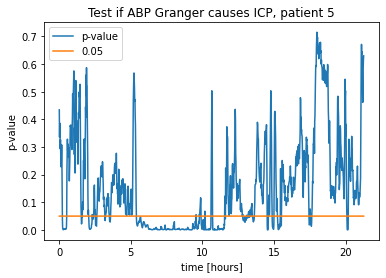

In [25]:
plt.plot(time_hours5, y_to_x_p_median_5)
plt.plot(time_hours5, 0*time_hours5+0.05)
plt.legend(['p-value', '0.05'])
plt.xlabel('time [hours]')
plt.ylabel('p-value')
plt.title('Test if ABP Granger causes ICP, patient 5')

In [26]:
plt.plot(time_hours5, x_to_y_p_median_5)
plt.plot(time_hours5, 0*time_hours5+0.05)
plt.legend(['p-value', '0.05'])
plt.xlabel('time [hours]')
plt.ylabel('p-value')
plt.title('Test if ICP Granger causes ABP, patient 5')


Text(0.5, 1.0, 'Test if ICP Granger causes ABP, patient 5')

## Patient 1

Text(0.5, 1.0, 'Test if ABP Granger causes ICP, patient 1')

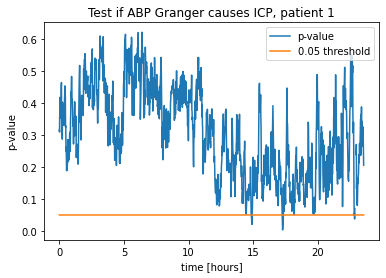

In [27]:
plt.plot(time_hours1, y_to_x_p_median_1)
plt.plot(time_hours1, 0*time_hours1+0.05)
plt.legend(['p-value', '0.05 threshold'])
plt.xlabel('time [hours]')
plt.ylabel('p-value')
plt.title('Test if ABP Granger causes ICP, patient 1')

In [28]:
plt.plot(time_hours1, x_to_y_p_median_1)
plt.plot(time_hours1, 0*time_hours1+0.05)
plt.legend(['p-value', '0.05 threshold'])
plt.xlabel('time [hours]')
plt.ylabel('p-value')
plt.title('Test if ICP Granger causes ABP, patient 1')

Text(0.5, 1.0, 'Test if ICP Granger causes ABP, patient 1')

# Zooming in on interesting periods patient 1, IPC -> ABP

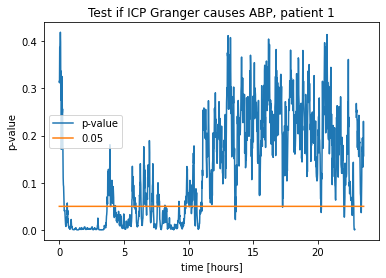

In [29]:
# Patient 1 ICP -> ABP all points
plt.plot(time_hours1, x_to_y_p_median_1)
plt.plot(time_hours1, 0*time_hours1+0.05)
plt.xlabel('time [hours]')
plt.ylabel('p-value')
plt.title('Test if ICP Granger causes ABP, patient 1')
plt.legend(['p-value', '0.05'])
plt.savefig('../data/figures/ICP_gc_ABP_patient1_all.jpg', dpi=1000)

In [30]:
# Patient 1 ICP -> ABP 2 hours
start_time = round(0.5*60) # hours*minutes
time_window = round(3*60) # hours*minutes
indices = list(range(start_time, start_time+time_window))
plt.plot(time_hours1[indices], x_to_y_p_median_1.values.flatten()[indices])
plt.plot(time_hours1[indices], 0*time_hours1[indices]+0.05)
plt.xlabel('time [hours]')
plt.ylabel('p-value')
plt.title('Test if ICP Granger causes ABP, patient 1')
plt.legend(['p-value', '0.05'])
plt.savefig('../data/figures/ICP_gc_ABP_2_hours_zoom.jpg', dpi=1000)

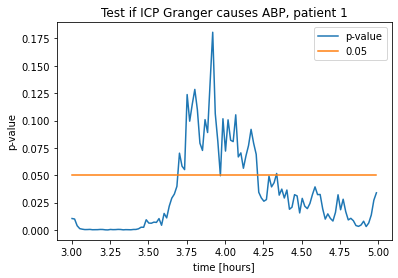

In [31]:
# Patient 1 ICP -> ABP 4 hours
start_time = round(3*60) # hours*minutes
time_window = round(2*60) # hours*minutes
indices = list(range(start_time, start_time+time_window))
plt.plot(time_hours1[indices], x_to_y_p_median_1.values.flatten()[indices])
plt.plot(time_hours1[indices], 0*time_hours1[indices]+0.05)
plt.xlabel('time [hours]')
plt.ylabel('p-value')
plt.title('Test if ICP Granger causes ABP, patient 1')
plt.legend(['p-value', '0.05'])
plt.savefig('../data/figures/ICP_gc_ABP_4_hours_zoom.jpg', dpi=1000)

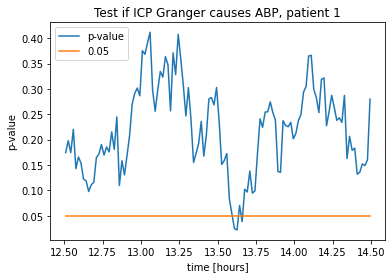

In [32]:
# Patient 1 ICP -> ABP 13 hours
start_time = round(12.5*60) # hours*minutes
time_window = round(2*60) # hours*minutes
indices = list(range(start_time, start_time+time_window))
plt.plot(time_hours1[indices], x_to_y_p_median_1.values.flatten()[indices])
plt.plot(time_hours1[indices], 0*time_hours1[indices]+0.05)
plt.xlabel('time [hours]')
plt.ylabel('p-value')
plt.title('Test if ICP Granger causes ABP, patient 1')
plt.legend(['p-value', '0.05'])
plt.savefig('../data/figures/ICP_gc_ABP_13_hours_zoom.jpg', dpi=1000)

### Zooming in on interesting periods patient 4, ABP -> ICP

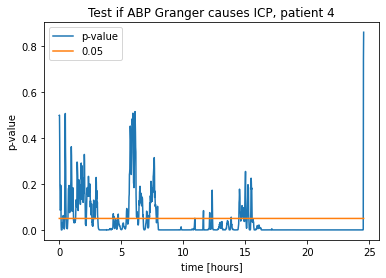

In [33]:
# Patient 4 ABP -> ICP all points
plt.plot(time_hours4, y_to_x_p_median_4)
plt.plot(time_hours4, 0*time_hours4+0.05)
plt.xlabel('time [hours]')
plt.ylabel('p-value')
plt.title('Test if ABP Granger causes ICP, patient 4')
plt.legend(['p-value', '0.05'])
plt.savefig('../data/figures/Patient4_ABP_gc_IPC_all.jpg', dpi=1000)

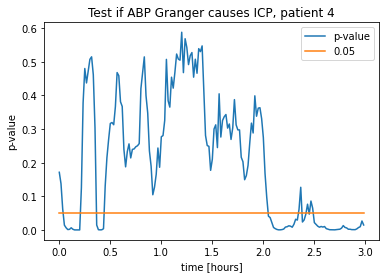

In [34]:
# Patient 4 ABP -> ICP 0 hours
start_time = round(0*60) # hours*minutes
time_window = round(3*60) # hours*minutes
indices = list(range(start_time, start_time+time_window))
plt.plot(time_hours4[indices], x_to_y_p_median_4.values.flatten()[indices])
plt.plot(time_hours4[indices], 0*time_hours4[indices]+0.05)
plt.xlabel('time [hours]')
plt.ylabel('p-value')
plt.title('Test if ABP Granger causes ICP, patient 4')
plt.legend(['p-value', '0.05'])
plt.savefig('../data/figures/Patient4_ABP_gc_IPC_0_hours_zoom.jpg', dpi=1000)

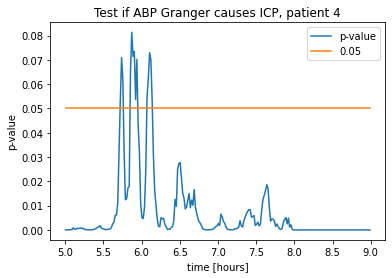

In [35]:
# Patient 4 ABP -> ICP 4 hours
start_time = round(5*60) # hours*minutes
time_window = round(4*60) # hours*minutes
indices = list(range(start_time, start_time+time_window))
plt.plot(time_hours4[indices], x_to_y_p_median_4.values.flatten()[indices])
plt.plot(time_hours4[indices], 0*time_hours4[indices]+0.05)
plt.xlabel('time [hours]')
plt.ylabel('p-value')
plt.title('Test if ABP Granger causes ICP, patient 4')
plt.legend(['p-value', '0.05'])
plt.savefig('../data/figures/Patient4_ABP_gc_IPC_5_hours_zoom.jpg', dpi=1000)

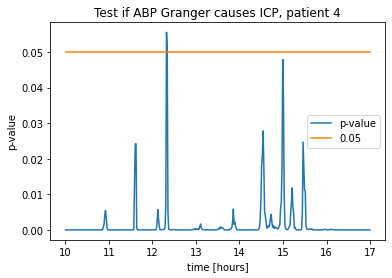

In [36]:
# Patient 4 ABP -> ICP 10 hours
start_time = round(10*60) # hours*minutes
time_window = round(7*60) # hours*minutes
indices = list(range(start_time, start_time+time_window))
plt.plot(time_hours4[indices], x_to_y_p_median_4.values.flatten()[indices])
plt.plot(time_hours4[indices], 0*time_hours4[indices]+0.05)
plt.xlabel('time [hours]')
plt.ylabel('p-value')
plt.title('Test if ABP Granger causes ICP, patient 4')
plt.legend(['p-value', '0.05'])
plt.savefig('../data/figures/Patient4_ABP_gc_IPC_10_hours_zoom.jpg', dpi=1000)